In [1]:
import pandas as pd

In [2]:
!pip install snscrape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.1 MB/s eta 0:00:00


In [3]:
import snscrape.modules.twitter as sntwitter

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt


In [6]:
import seaborn as sns

In [7]:
import nltk

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [10]:

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS

from wordcloud import ImageColorGenerator

import warnings
%matplotlib inline

In [11]:
import os

# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 5000 --since 2023-01-31 twitter-search 'Budget 2023 until:2023-02-03' > text-query-tweets.json")

256

In [12]:
import pandas as pd

# Reads the json generated from the CLI commands above and creates a pandas dataframe
tweets_df = pd.read_json('text-query-tweets.json', lines=True)

In [13]:
tweets_df.head()

""


In [14]:
tweets_df.to_csv()

'""\n'

In [15]:
df = pd.read_csv("sma.csv")

In [16]:
df.head(5)

,id,author,description,guid,to,likecount,link,pubdate,replycount,title,authorChannelUrl,Unnamed: 11
0,1,@sherylhowell3061,I wish this anime never ends until muzan is de...,UgzLbN7zivs-_vc5hOB4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 11:01:27,0,I wish this anime never ends until muzan is de...,http://www.youtube.com/@sherylhowell3061,NaN
1,2,@bsnsj4659,Boku no hero academy : where is my Intellectua...,UgxK7GcRTkmmVyXhoX94AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 10:16:30,0,Boku no hero academy : where is my Intellectua...,http://www.youtube.com/@bsnsj4659,NaN
2,3,@ThereRobloxgirl,I just got crunchyroll,UgxJDwUKB-DV4-FSsvp4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 08:06:03,0,I just got crunchyroll,http://www.youtube.com/@ThereRobloxgirl,NaN
3,4,@asphyxia35p21,"When I heard Gyomei\'s voice, It\'s always Gin...",Ugx6roKZSFI2--GNoj14AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 06:35:10,0,"When I heard Gyomei\'s voice, It\'s always Gin...",http://www.youtube.com/@asphyxia35p21,NaN
4,5,@asphyxia35p21,Gintoki?!!!!!!,Ugw07D17qa51KT9djeJ4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 06:33:53,0,Gintoki?!!!!!!,http://www.youtube.com/@asphyxia35p21,NaN


In [17]:
print(df.shape)

(2404, 12)


In [18]:
df.info()
df.pubdate.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2404 non-null   int64  
 1   author            2403 non-null   object 
 2   description       2404 non-null   object 
 3   guid              2404 non-null   object 
 4   to                454 non-null    object 
 5   likecount         2404 non-null   int64  
 6   link              2404 non-null   object 
 7   pubdate           2404 non-null   object 
 8   replycount        2404 non-null   int64  
 9   title             2404 non-null   object 
 10  authorChannelUrl  2404 non-null   object 
 11  Unnamed: 11       0 non-null      float64
dtypes: float64(1), int64(3), object(8)
memory usage: 225.5+ KB


pubdate
2024-04-08 11:55:25    2
2024-04-08 12:21:05    2
2024-04-08 12:27:08    2
2024-04-08 14:50:10    2
2024-04-08 12:23:11    2
                      ..
2024-04-09 20:57:31    1
2024-04-09 20:49:52    1
2024-04-09 20:49:50    1
2024-04-09 20:41:39    1
2024-04-08 11:00:49    1
Name: count, Length: 2369, dtype: int64

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

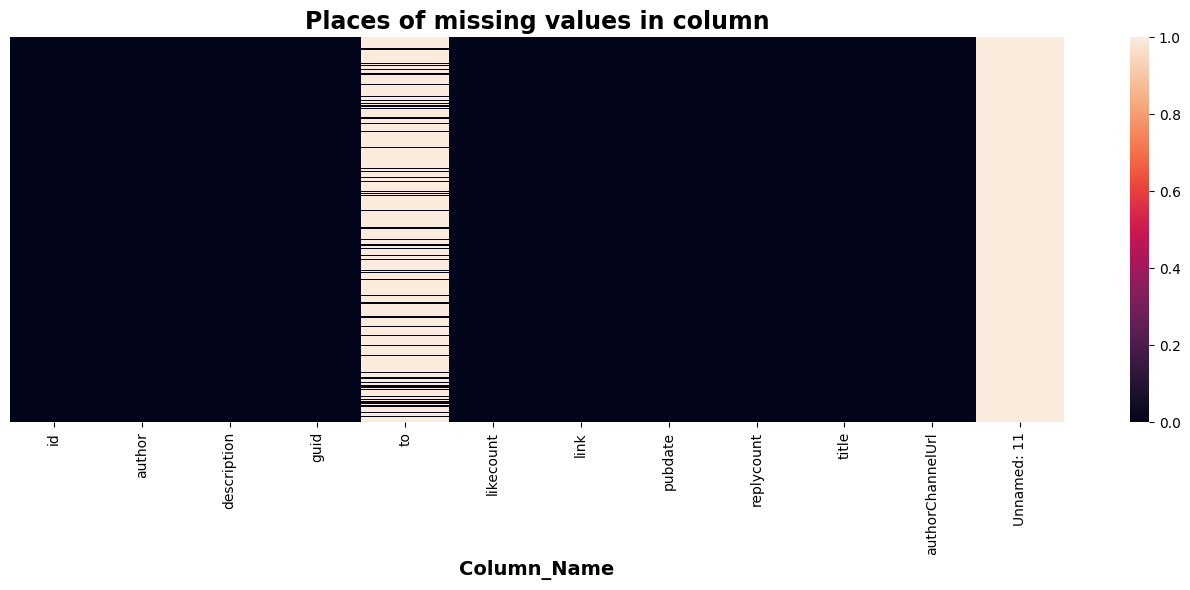

In [20]:
#Heat Map for missing values
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [21]:
import plotly.graph_objects as go
Top_Title_Of_tweet= df['title'].value_counts().head(10)

In [22]:
print (Top_Title_Of_tweet)

title
Check out our latest quiz Demon Slayer characters! On our Channel    33
12 may                                                                5
❤                                                                     4
Finally                                                               3
he is there                                                           3
Doushino forever 💙💙💙                                                  3
he will be there                                                      3
❤❤                                                                    3
May 12                                                                3
😍                                                                     3
Name: count, dtype: int64


In [23]:
import nltk

In [24]:
stop=nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['description'].apply(lambda x: [item for item in x if item not in stop])
df.shape
df.head()

,id,author,description,guid,to,likecount,link,pubdate,replycount,title,authorChannelUrl,Unnamed: 11
0,1,@sherylhowell3061,I wish this anime never ends until muzan is de...,UgzLbN7zivs-_vc5hOB4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 11:01:27,0,I wish this anime never ends until muzan is de...,http://www.youtube.com/@sherylhowell3061,NaN
1,2,@bsnsj4659,Boku no hero academy : where is my Intellectua...,UgxK7GcRTkmmVyXhoX94AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 10:16:30,0,Boku no hero academy : where is my Intellectua...,http://www.youtube.com/@bsnsj4659,NaN
2,3,@ThereRobloxgirl,I just got crunchyroll,UgxJDwUKB-DV4-FSsvp4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 08:06:03,0,I just got crunchyroll,http://www.youtube.com/@ThereRobloxgirl,NaN
3,4,@asphyxia35p21,"When I heard Gyomei\'s voice, It\'s always Gin...",Ugx6roKZSFI2--GNoj14AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 06:35:10,0,"When I heard Gyomei\'s voice, It\'s always Gin...",http://www.youtube.com/@asphyxia35p21,NaN
4,5,@asphyxia35p21,Gintoki?!!!!!!,Ugw07D17qa51KT9djeJ4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 06:33:53,0,Gintoki?!!!!!!,http://www.youtube.com/@asphyxia35p21,NaN


In [26]:
!pip install tweet-preprocessor

In [27]:
#Remove unnecessary characters
punct =['%','/',':','\\','&amp;','&',';', '?']

def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

In [28]:
df=df.drop_duplicates('description')

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['description'].apply(lambda x: [item for item in x if item not in stop])
df.shape

(2323, 12)

In [30]:
df['description'] = df['description'].apply(lambda x: remove_punctuations(x))

In [31]:
#Drop tweets which have empty text field
df['description'].replace(' ', np.nan, inplace=True)
df.dropna(subset=['description'], inplace=True)
len(df)

2323

In [32]:
df = df.reset_index(drop=True)
df.sample(5)

,id,author,description,guid,to,likecount,link,pubdate,replycount,title,authorChannelUrl,Unnamed: 11
1228,1255,@TakiMitsuha2016,I hope we get to see demon slayer sequel,Ugxs9gETiuyqBu-Xtt94AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-08 18:24:33,0,I hope we get to see demon slayer sequel,http://www.youtube.com/@TakiMitsuha2016,NaN
1726,1791,@parasrawat1217,Goetia is gyomou now,Ugwttp6j4gJb0Y8Epzh4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-08 13:03:32,0,Goetia is gyomou now,http://www.youtube.com/@parasrawat1217,NaN
955,977,@MrCabbage-qz2vd,@@defensivemaneuver actually its not bad but i...,UgwgZOXLUF3voB60Uq54AaABAg.A2-fzm_rvggA2826xFmEKh,@simples16,1,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-12 10:22:20,0,@@defensivemaneuver actually its not bad but i...,http://www.youtube.com/@MrCabbage-qz2vd,NaN
1083,1107,@ShinigamiArts69,Yessss 🎉,UgxF_nSI16vggCOvMu54AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-08 22:31:52,0,Yessss 🎉,http://www.youtube.com/@ShinigamiArts69,NaN
604,615,@naveensilva2312,Cant wait!,UgzcAsVLI5tdCptC1dR4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-10 12:11:50,0,Cant wait!,http://www.youtube.com/@naveensilva2312,NaN


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['thank'] not in stop_words.
  warnings.warn(
<ipython-input-34-b2c7c509e282>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos, y=counts, palette='husl')


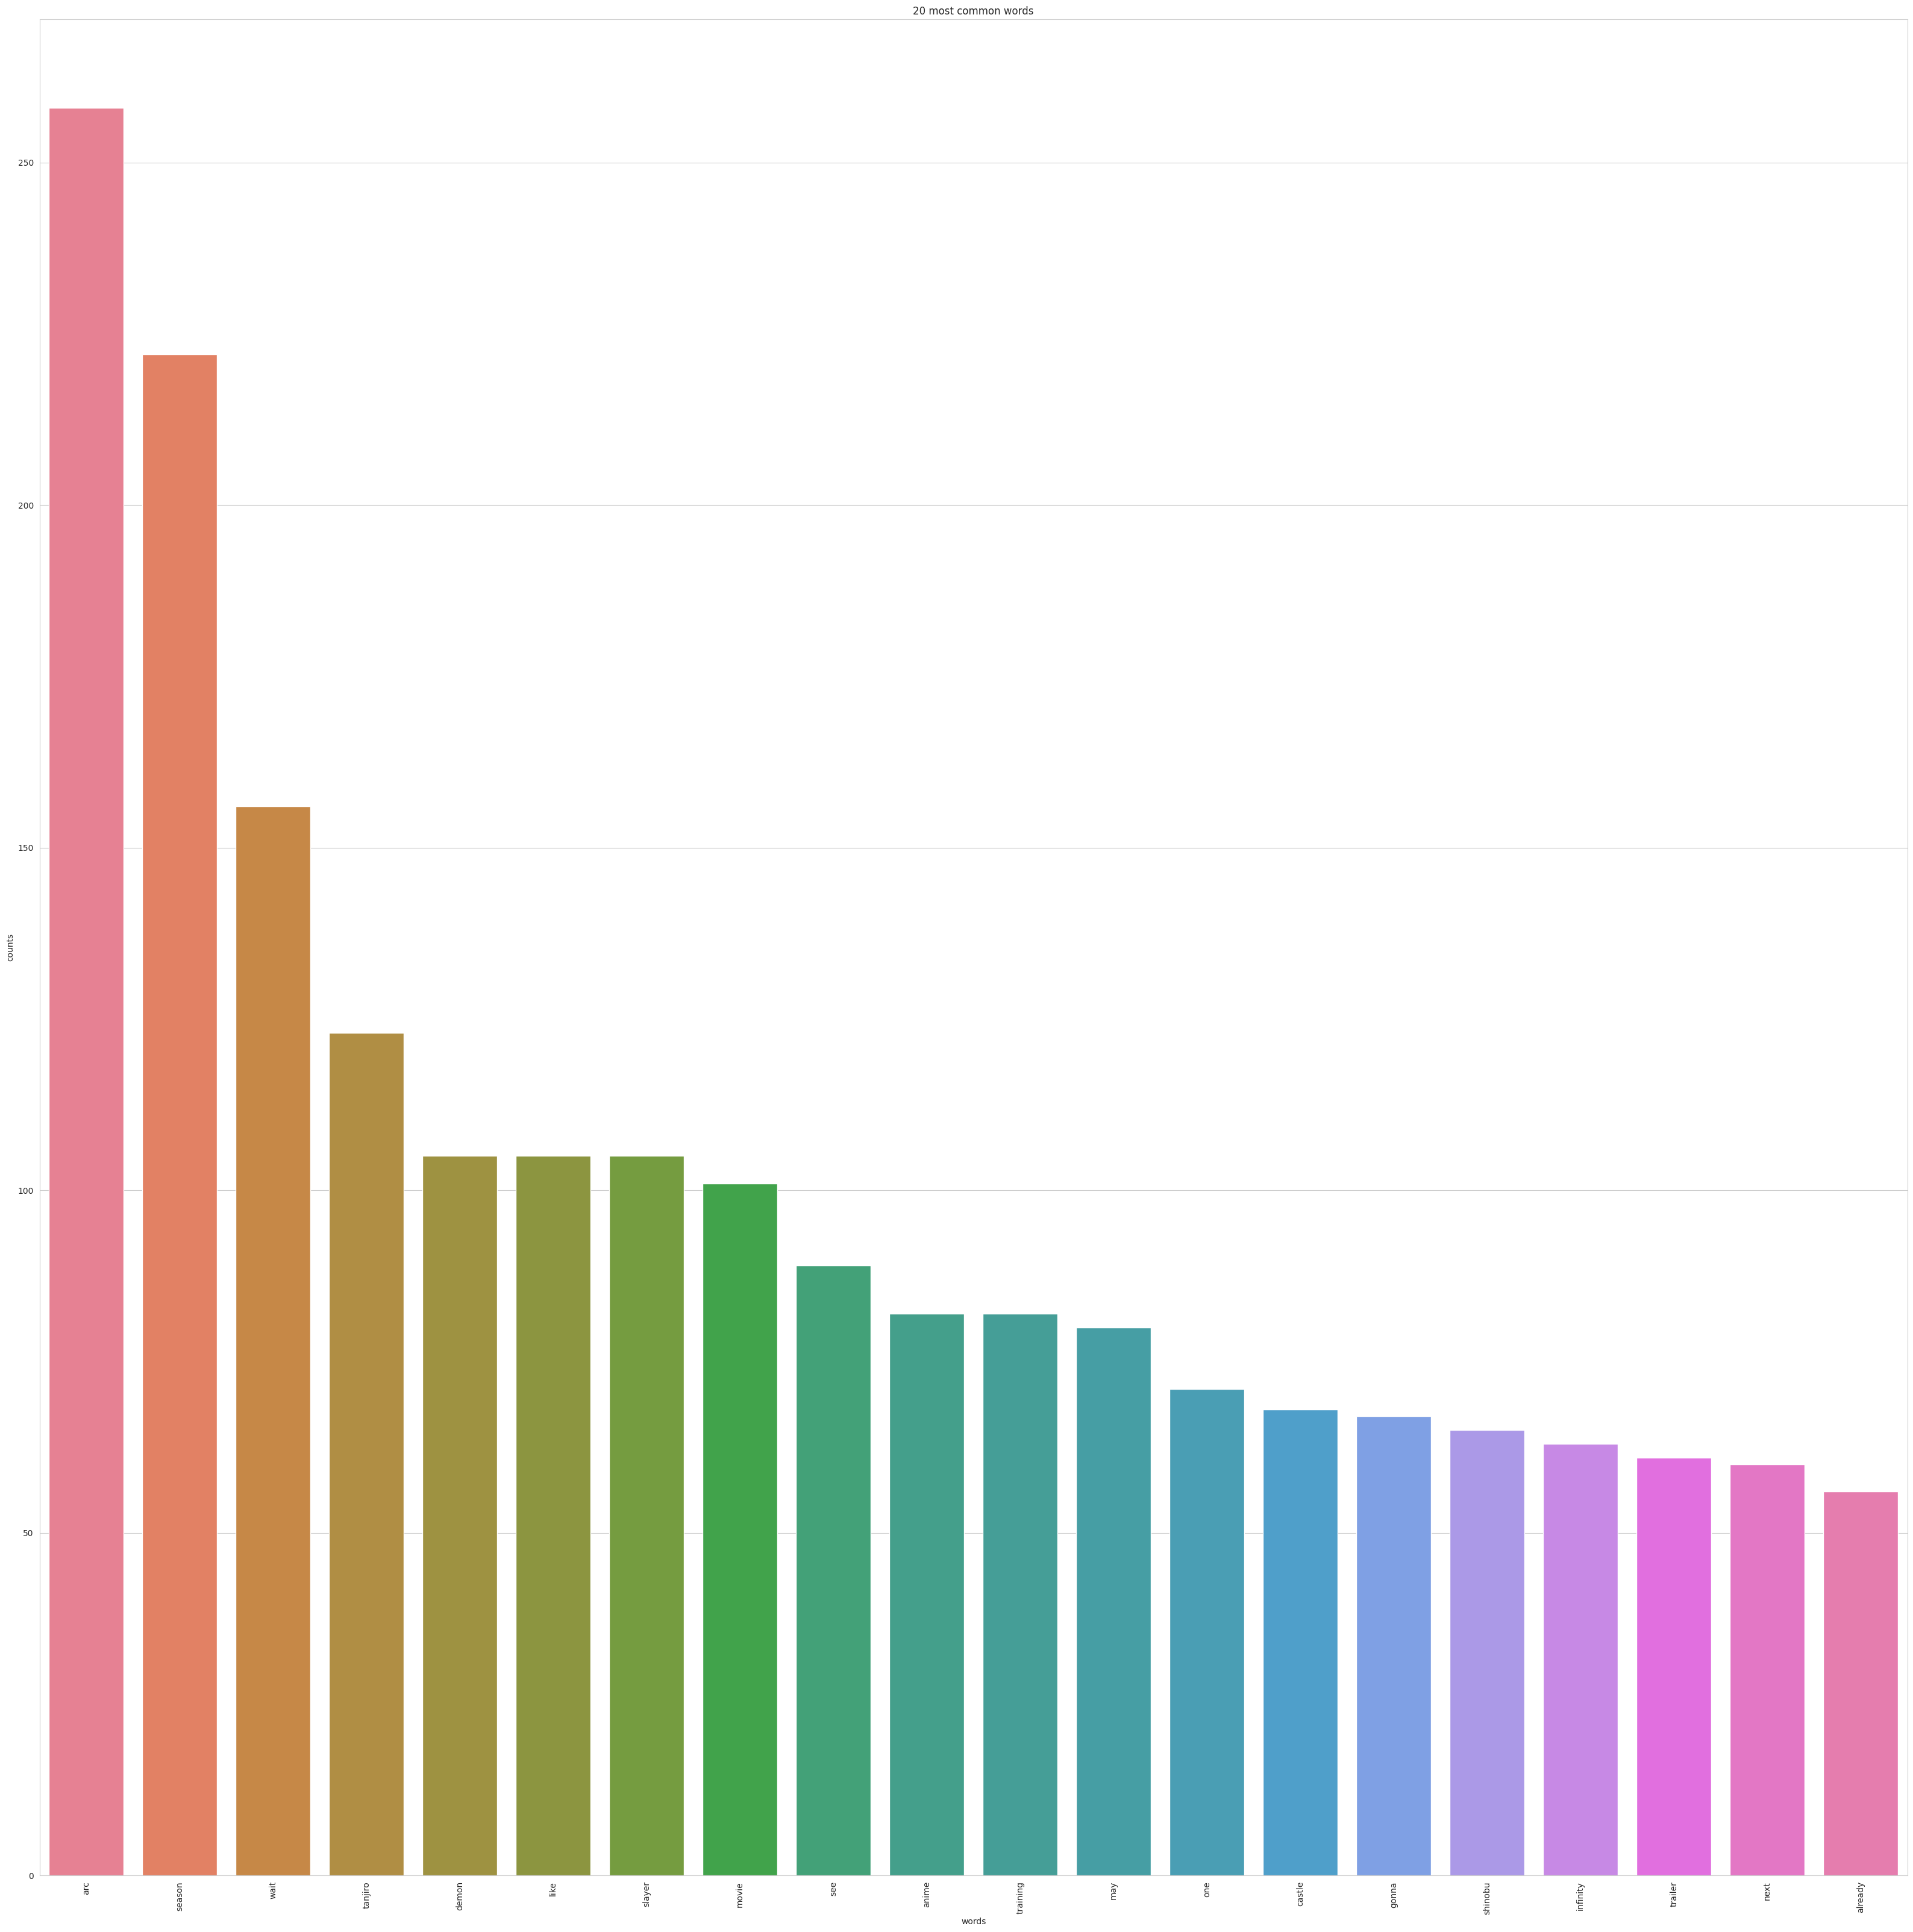

<Figure size 640x480 with 0 Axes>

In [34]:
sns.set_style('whitegrid')
%matplotlib inline
stop=stop +['hello','good','http','love','happy','Thank','heart','me','mood','video','india']
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(40, 40))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=4, rc={"lines.linewidth": 2.5})

    sns.barplot(x=x_pos, y=counts, palette='husl')
    #sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
 # Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stop)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['description'])
# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)
plt.savefig('saved_figure.png')

<Axes: title={'center': 'Top 8 bigrams '}, ylabel='ngram'>

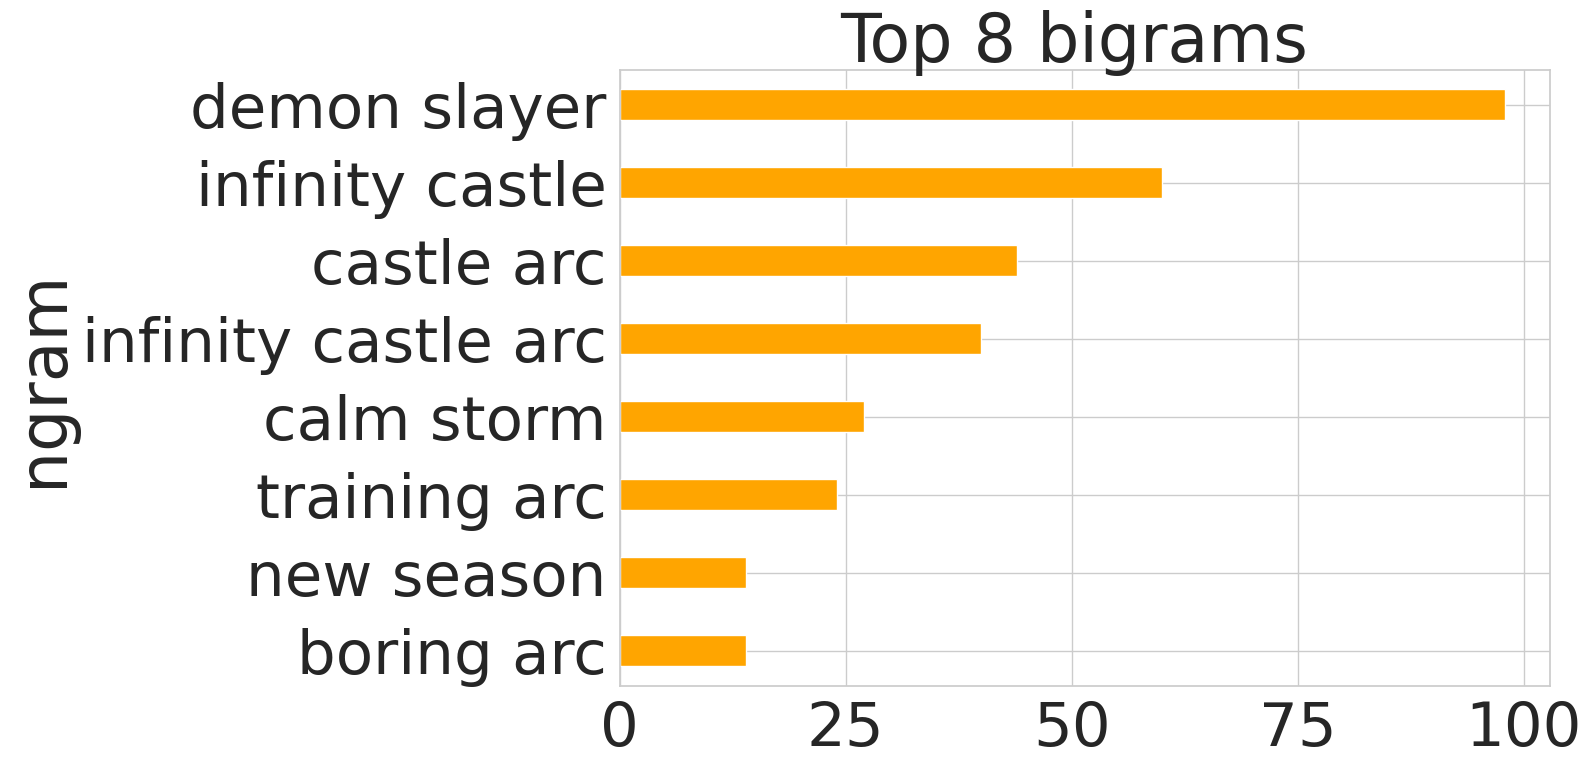

In [35]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 4), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['description'], 8)
mydict={}
for word, freq in common_words:
    bigram_df  = pd.DataFrame(common_words, columns = ['ngram' , 'count'])
bigram_df.groupby('ngram').sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title='Top 8 bigrams ', color='orange', width=.4, figsize=(12, 8), stacked = True)

#iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 10 bigrams ')

In [36]:
!pip install textblob


In [37]:
from textblob import TextBlob

In [38]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [39]:
df['subjectivity'] = df['description'].apply(get_subjectivity)
df['polarity'] = df['description'].apply(get_polarity)
df.head()

,id,author,description,guid,to,likecount,link,pubdate,replycount,title,authorChannelUrl,Unnamed: 11,subjectivity,polarity
0,1,@sherylhowell3061,I wish this anime never ends until muzan is de...,UgzLbN7zivs-_vc5hOB4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 11:01:27,0,I wish this anime never ends until muzan is de...,http://www.youtube.com/@sherylhowell3061,NaN,0.0,0.0
1,2,@bsnsj4659,Boku no hero academy where is my Intellectual...,UgxK7GcRTkmmVyXhoX94AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 10:16:30,0,Boku no hero academy : where is my Intellectua...,http://www.youtube.com/@bsnsj4659,NaN,0.4,0.3
2,3,@ThereRobloxgirl,I just got crunchyroll,UgxJDwUKB-DV4-FSsvp4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 08:06:03,0,I just got crunchyroll,http://www.youtube.com/@ThereRobloxgirl,NaN,0.0,0.0
3,4,@asphyxia35p21,"When I heard Gyomei's voice, It's always Ginto...",Ugx6roKZSFI2--GNoj14AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 06:35:10,0,"When I heard Gyomei\'s voice, It\'s always Gin...",http://www.youtube.com/@asphyxia35p21,NaN,0.0,0.0
4,5,@asphyxia35p21,Gintoki!!!!!!,Ugw07D17qa51KT9djeJ4AaABAg,NaN,0,https://www.youtube.com/watch?v=PraFso1sVIc&lc...,2024-04-28 06:33:53,0,Gintoki?!!!!!!,http://www.youtube.com/@asphyxia35p21,NaN,0.0,0.0


In [40]:
# Obtain polarity scores generated by TextBlob
df['textblob_score'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [41]:
neutral_threshold = 0.05


In [42]:
# Convert polarity score into sentiment categories
df['textblob_sentiment'] = df['textblob_score'].apply(lambda c: 'Positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral'))


In [43]:
textblob_df = df[['description', 'textblob_sentiment', 'likecount']]
textblob_df

,description,textblob_sentiment,likecount
0,I wish this anime never ends until muzan is de...,Neutral,0
1,Boku no hero academy where is my Intellectual...,Positive,0
2,I just got crunchyroll,Neutral,0
3,"When I heard Gyomei's voice, It's always Ginto...",Neutral,0
4,Gintoki!!!!!!,Neutral,0
...,...,...,...
2318,NOICE,Neutral,1
2319,LOVE this series 🎉🎉🎉🎉😈😈🔥🔥,Positive,18
2320,firrt,Neutral,1
2321,Oo,Neutral,1


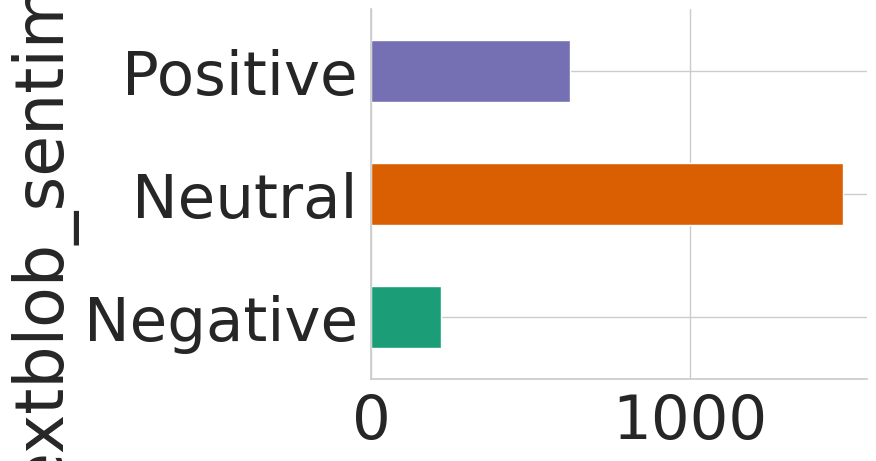

In [44]:
# @title textblob_sentiment

from matplotlib import pyplot as plt
import seaborn as sns
textblob_df.groupby('textblob_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [45]:
textblob_df['textblob_sentiment'].value_counts()

textblob_sentiment
Neutral     1479
Positive     624
Negative     220
Name: count, dtype: int64

<Axes: title={'center': 'Sentiment Analysis '}, ylabel='textblob_sentiment'>

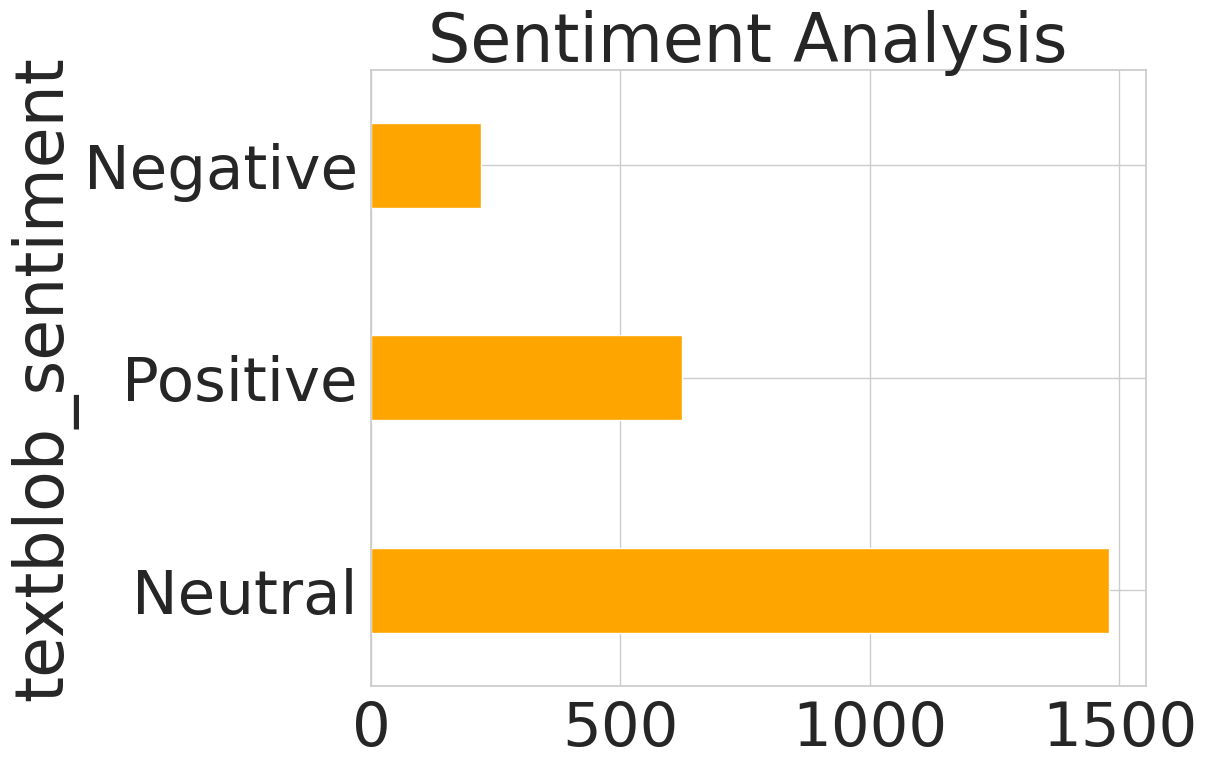

In [46]:
textblob_df['textblob_sentiment'].value_counts().plot.barh(title='Sentiment Analysis ', color='orange', width=.4, figsize=(10, 8), stacked = True)

In [47]:
df_positive=textblob_df[textblob_df['textblob_sentiment']=='Positive']

In [48]:
df_Very_positive=df_positive[df_positive['likecount']>0]

In [49]:
df_Very_positive.head()

,description,textblob_sentiment,likecount
25,105 I dare say this theme song is better than ...,Positive,1
41,I ready for Obanai🥰,Positive,1
43,Is this a movie or a new season,Positive,1
53,❤❤THANK YOU VERY MUCH CRUNCHYROLL FOR BRINGING...,Positive,1
60,Da whole season...,Positive,1


In [50]:
df_negative=textblob_df[textblob_df['textblob_sentiment']=='Negative']

In [51]:
df_negative.head()

,description,textblob_sentiment,likecount
6,"Just finished the movie, I would've been mad a...",Negative,0
59,yess.....8 eps in total.....1st ep will be 1 h...,Negative,1
68,Birthday I mean,Negative,0
78,"@@DarkyConky Annoying af, but ok I guess. 🙄🙄🙄",Negative,0
82,101 i had a really bad feeling aboyt this new ...,Negative,0


In [52]:
df_neutral=textblob_df[textblob_df['textblob_sentiment']=='Neutral']

In [53]:
df_neutral.head()

,description,textblob_sentiment,likecount
0,I wish this anime never ends until muzan is de...,Neutral,0
2,I just got crunchyroll,Neutral,0
3,"When I heard Gyomei's voice, It's always Ginto...",Neutral,0
4,Gintoki!!!!!!,Neutral,0
5,They done made tanjiro like asta,Neutral,0


In [54]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

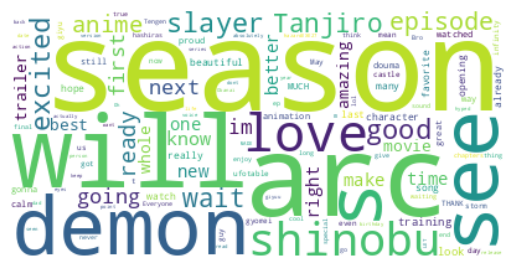

In [55]:
#Creating the text variable
positive_tw = " ".join(t for t in df_Very_positive.description)

# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(positive_tw)

# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')

plt.axis("off")

plt.show()

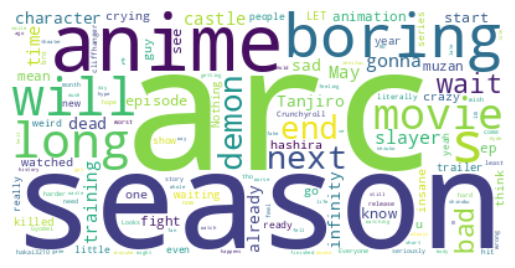

In [56]:
#Creating the text variable
negative_tw = " ".join(t for t in df_negative.description)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(negative_tw)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()